# 🌾 Cotton Weed Detection Challenge - Starter Notebook

## Quick Start Guide

This notebook walks you through:
1. **Environment Setup** - Install 3LC and required packages
2. **Dataset Registration** - Create 3LC Tables for data management
3. **Baseline Training** - Train YOLOv8n with run tracking
4. **Generate Predictions** - Create Kaggle submission
5. **Iterative Improvement** - Use 3LC Dashboard to improve data quality

### About 3LC (Three Lines of Code)
3LC is a data-centric AI platform that enables the **train–fix–retrain loop**:
- **Train** - Track experiments automatically
- **Analyze** - Use Dashboard to find data issues
- **Fix** - Correct labels and improve quality
- **Retrain** - Iterate with better data

**Let's begin!**

---
# Environment Setup

## Before You Begin

This notebook uses **3LC (Three Lines of Code)** for data-centric AI workflows. Follow these steps to set up your environment.

### Video Guide
Watch the full setup walkthrough: [3LC Quickstart Video](https://www.youtube.com/watch?v=zdIq1QpeSI8&list=PLFOZfHCPrAhDbgmxYcu9Qq5UUVMf7YLFy)

---

## Step 1: Create a 3LC Account

1. Go to [https://account.3lc.ai](https://account.3lc.ai)
2. Create your account
   - **Note:** A default workspace is automatically created for you (visible after login)
   - Your workspace name is what others on your team will see when collaborating
3. Get your API key from [https://account.3lc.ai/api-key](https://account.3lc.ai/api-key) and save it for the next step

   <div align="left">
   <img src="content/api.png" alt="Description" width="600">
   </div>

---

## Step 2: Set Up Python Environment (Recommended)

### Create a Virtual Environment

**Windows:**
```bash
python -m venv cotton-weed-env
cotton-weed-env\Scripts\activate
```

**Linux/MacOS:**
```bash
python -m venv cotton-weed-env
source cotton-weed-env/bin/activate
```

**Note:** You can skip this if you prefer to use your current Python environment.

---

## Step 3: Install 3LC and Dependencies

### ⚠️ Important: PyTorch GPU Setup (For GPU Training)

The following command will install PyTorch, but **by default it installs the CPU version**. 

**If you have a GPU and want to use it for training:**
1. First, install 3LC: `pip install 3lc-ultralytics`
2. Then, **reinstall PyTorch with CUDA support:**
   ```bash
   # For CUDA 11.8
   pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118
   
   # For CUDA 12.1
   pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121
   ```
   Visit [PyTorch Get Started](https://pytorch.org/get-started/locally/) to find the correct command for your CUDA version.

**If you're fine with CPU training (slower but works):**
```bash
pip install 3lc-ultralytics
```

**What gets installed:**
- `3lc-ultralytics` - 3LC integration with Ultralytics YOLO
- `3lc` - Core 3LC library
- `ultralytics`, `torch`, `pandas`, `numpy`, `pillow`, `pycocotools`, and other dependencies

**System Requirements:**
- Python 3.8+ 
- Windows 10+, Linux, or macOS
- GPU with CUDA (optional but recommended for faster training)

---

## Step 4: Login to 3LC

Once Finished with installation in the same terminal login using an API key. [Create one if not present](https://account.3lc.ai/api-key). 
Replace `<your_api_key>` with your actual API key:

```bash
3lc login <your_api_key>
```

This saves your API key locally. **For future sessions, you don't need to run this again.**

---

## Step 5: Start the 3LC Service (For Dashboard visualization)

**Important Clarification:**
- The 3LC service is **NOT required for training** - you can train models without it
- It **IS required** if you want to use the 3LC Dashboard to visualize and analyze your data/runs
- Since the Dashboard is a key part of the data-centric workflow, we recommend starting it

**To start the service, run in the terminal:**
```bash
3lc service
```
   <div align="left">
   <img src="content/service.png" alt="Description" width="600">
   </div>

**What happens:**
- Starts the local service for Dashboard connectivity
- Loads some preloaded example projects to help you learn 3LC
- These examples are useful for getting familiar with the Dashboard features

**Keep this terminal open while using the Dashboard.** To stop: Press `Q` or `Ctrl+C`.

---

## Step 6: Open 3LC Dashboard (For visualization)

Once the service is running, open [https://dashboard.3lc.ai](https://dashboard.3lc.ai) in your browser.

**Browser Requirements:**
- Chrome (recommended), Firefox, or Edge (latest versions)
- Hardware acceleration enabled (GPU) for smoother experience
  - Setup guide: [3LC GPU Acceleration Guide](https://docs.3lc.ai/3lc/latest/user-guide/dashboard/gpu-acceleration.html)

**Tip:** Explore the preloaded example projects to learn Dashboard features before working on competition data!

---

## Verification Checklist

Before running the notebook, ensure:

1. ✅ 3LC account created and API key obtained
2. ✅ Python environment activated (if using venv)
3. ✅ `3lc-ultralytics` installed
4. ✅ PyTorch GPU version installed (if you have a GPU)
5. ✅ Logged in to 3LC (`3lc login <api_key>`)
6. ✅ 3LC service running and Dashboard open

**For future sessions:** Only steps 2 and 6 are needed (activate environment and optionally start service/Dashboard).

---

## Additional Resources

- [3LC Documentation](https://docs.3lc.ai/)
- [3LC Example Notebooks](https://github.com/3lc-ai/3lc-examples?tab=readme-ov-file)
- [Getting Started Video Playlist](https://www.youtube.com/watch?v=zdIq1QpeSI8&list=PLFOZfHCPrAhDbgmxYcu9Qq5UUVMf7YLFy)

---

## Troubleshooting

**"3lc: command not found"**
→ Activate your Python environment or reinstall 3lc

**"API key invalid"**
→ Check your API key at [https://account.3lc.ai/api-key](https://account.3lc.ai/api-key)

**"No GPU detected" during training**
→ Reinstall PyTorch with CUDA support (see Step 3)

**"Cannot connect to Dashboard"**
→ Make sure `3lc service` is running in a terminal


**Ready? Let's begin!**


---
## Phase 1: Environment Setup & Dataset Registration

First, let's verify our environment and register the dataset with 3LC Tables.

In [1]:
# Import required packages
import torch
import tlc
from pathlib import Path
import pandas as pd
from IPython.display import display

# Check environment
print("Environment Check:")
print("=" * 50)
print(f"PyTorch version: {torch.__version__}")
print(f"3LC version: {tlc.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(
        f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB"
    )
else:
    print("!!! No GPU detected - training will be slower on CPU")

print("\n All systems ready! Let's begin.")

Environment Check:
PyTorch version: 2.9.0+cpu
3LC version: 2.19.0.13
CUDA available: False
!!! No GPU detected - training will be slower on CPU

 All systems ready! Let's begin.


In [11]:
import sys
print(sys.executable)

c:\Users\markusmaripuu\AppData\Local\anaconda3\python.exe


---
## Step 1: Dataset Configuration

The competition dataset is organized in YOLO format with train/val/test splits already prepared.

### Dataset Structure:
```
cotton_weed_dataset/
├── train/images/        # 542 training images
├── train/labels/        # 542 YOLO label files  
├── val/images/          # 133 validation images
├── val/labels/          # 133 YOLO label files
├── test/images/         # 170 test images (no labels provided)
└── dataset.yaml         # YOLO dataset configuration
```

### Test Set Information:
The test set contains **170 images** split as follows:
- **Public leaderboard**: 85 images (50%)
- **Private leaderboard**: 85 images (50%)

**Note**: All 170 test images are included in the download for convenience. Only the public/private split determines which images are used for each leaderboard score.

### YOLO Label Format:
Each `.txt` file contains bounding boxes: `class_id x_center y_center width height`  
All coordinates are normalized to [0, 1]

### ⚠️ Data Quality Note:
This dataset includes labeling imperfections. You'll need to identify and fix these issues to maximize performance.

In [2]:
# Set up file paths
WORK_DIR = Path(".")  # Current directory
DATASET_YAML = WORK_DIR / "dataset.yaml"

# Verify paths exist
print("Verifying dataset structure...")
print("=" * 50)

if not DATASET_YAML.exists():
    print(f"Could not find {DATASET_YAML}")
    print(f"Current directory: {Path.cwd()}")
    print("Please make sure dataset.yaml is in the current directory")
    raise FileNotFoundError(f"Dataset config not found: {DATASET_YAML}")

print(f"✅ Dataset config: {DATASET_YAML}")
print(f"✅ Working directory: {WORK_DIR.resolve()}")

# Display dataset configuration
print("\n Dataset Configuration:")
print("-" * 50)
with open(DATASET_YAML, "r") as f:
    config_content = f.read()
    print(config_content)

# Count dataset files
train_images = list((WORK_DIR / "train" / "images").glob("*.jpg"))
train_labels = list((WORK_DIR / "train" / "labels").glob("*.txt"))
val_images = list((WORK_DIR / "val" / "images").glob("*.jpg"))
val_labels = list((WORK_DIR / "val" / "labels").glob("*.txt"))
test_images = list((WORK_DIR / "test" / "images").glob("*.jpg"))

print("\n Dataset Statistics:")
print("-" * 50)
print(f"✅ Training:   {len(train_images)} images, {len(train_labels)} labels")
print(f"✅ Validation: {len(val_images)} images, {len(val_labels)} labels")
print(f"✅ Test: {len(test_images)} images")

Verifying dataset structure...
✅ Dataset config: dataset.yaml
✅ Working directory: C:\Users\markusmaripuu\Documents\Andmeteadus\Projekt\the-3lc-cotton-weed-detection-challenge\cotton_weed_competition_dataset

 Dataset Configuration:
--------------------------------------------------
# Cotton Weed Detection Dataset
# YOLOv8 Dataset Configuration

# Dataset paths (relative to this file)
path: .  # Root directory
train: train/images  # Training images
val: val/images      # Validation images
test: test/images    # Test images (optional)

# Number of classes
nc: 3

# Class names
names:
  0: carpetweed
  1: morningglory
  2: palmer_amaranth

# Dataset Information
# ------------------
# Dataset: CottonWeedDet3 - Cotton Weed Detection Challenge
# Purpose: Real-world agricultural weed detection with imperfect labels
# Format: YOLOv8 (YOLO format with normalized bounding boxes)
# 
# Dataset Statistics:
#   - Training images: 542
#   - Validation images: 133
#   - Test images: 170
#   - Total im

---
## Visual Guide: Target Weed Species

Before we dive into model development, let's familiarize ourselves with the three target weed species. Understanding their visual characteristics is crucial for effective model training and data quality assessment.

### 🌿 The Three Target Weeds:

**Class 0: Carpetweed (*Mollugo verticillata*)**
- Mat-forming low-growing weed
- Small, spoon-shaped leaves arranged in whorls
- Forms dense ground cover competing with cotton seedlings
- Light green color, spreads horizontally

**Class 1: Morning Glory (*Ipomoea* species)**
- Climbing/twining vine that wraps around cotton plants
- Heart-shaped or lobed leaves
- Major yield impact - strangles cotton plants
- Can have purple, white, or pink flowers

**Class 2: Palmer Amaranth (*Amaranthus palmeri*)**
- Tall, upright, fast-growing "super weed"
- Lance-shaped leaves with prominent veins
- Herbicide-resistant strain causing major agricultural problems
- Reddish stems, can grow several feet tall

**Why Visual Familiarity Matters:**
- Helps identify mislabeled samples during error analysis
- Enables better understanding of class confusion patterns
- Assists in recognizing missing annotations
- Improves data quality decisions in the train-fix-retrain loop

Let's view example images from our dataset to see what these weeds actually look like!


Finding example images for each weed class...
✓ Found example for Carpetweed: 20200526_iPhone8_CH_4.jpg
✓ Found example for Morning Glory: 20190613_6062W_CM_11.jpg
✓ Found example for Palmer Amaranth: 20190613_6062W_CM_17.jpg

Displaying example images with bounding boxes...


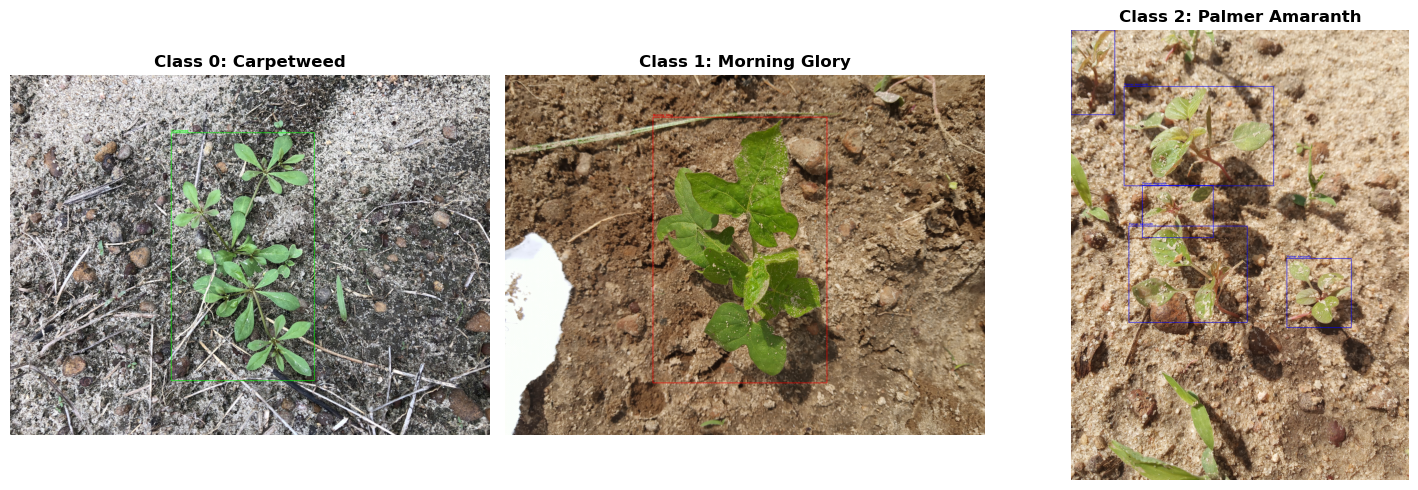


✅ Example images displayed!

 Pro Tip: Keep these visual characteristics in mind when:
   • Analyzing model predictions in the 3LC Dashboard
   • Identifying mislabeled or missing annotations
   • Understanding class confusion patterns


In [3]:
# Example images for each weed class
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from collections import defaultdict

print("Finding example images for each weed class...")
print("=" * 70)

# Set up paths
TRAIN_IMAGES = WORK_DIR / "train" / "images"
TRAIN_LABELS = WORK_DIR / "train" / "labels"
CLASS_NAMES = ["Carpetweed", "Morning Glory", "Palmer Amaranth"]

# Find images containing each class
class_examples = defaultdict(list)

for label_file in TRAIN_LABELS.glob("*.txt"):
    if label_file.stat().st_size > 0:
        with open(label_file, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id = int(parts[0])
                    image_file = TRAIN_IMAGES / f"{label_file.stem}.jpg"
                    if image_file.exists():
                        class_examples[class_id].append(image_file)

# Select one clear example per class (first occurrence)
examples_to_show = {}
for class_id in range(len(CLASS_NAMES)):
    if class_examples[class_id]:
        examples_to_show[class_id] = class_examples[class_id][0]
        print(
            f"✓ Found example for {CLASS_NAMES[class_id]}: {examples_to_show[class_id].name}"
        )
    else:
        print(f"!!!  No examples found for {CLASS_NAMES[class_id]}")

# Display the examples
if examples_to_show:
    print("\n" + "=" * 70)
    print("Displaying example images with bounding boxes...")
    print("=" * 70)

    fig, axes = plt.subplots(1, len(examples_to_show), figsize=(15, 5))
    if len(examples_to_show) == 1:
        axes = [axes]

    colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255)]  # BGR colors for OpenCV

    for idx, (class_id, image_path) in enumerate(sorted(examples_to_show.items())):
        # Read image
        img = cv2.imread(str(image_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]

        # Read corresponding label
        label_file = TRAIN_LABELS / f"{image_path.stem}.txt"
        with open(label_file, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    cls = int(parts[0])
                    if cls == class_id:  # Only draw boxes for the target class
                        # Convert YOLO format to pixel coordinates
                        x_center, y_center, box_w, box_h = map(float, parts[1:5])
                        x1 = int((x_center - box_w / 2) * w)
                        y1 = int((y_center - box_h / 2) * h)
                        x2 = int((x_center + box_w / 2) * w)
                        y2 = int((y_center + box_h / 2) * h)

                        # Draw bounding box
                        color = colors[class_id]
                        cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)

                        # Add class label
                        label_text = f"{CLASS_NAMES[class_id]}"
                        cv2.putText(
                            img,
                            label_text,
                            (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            0.8,
                            color,
                            2,
                        )

        # Display
        axes[idx].imshow(img)
        axes[idx].set_title(
            f"Class {class_id}: {CLASS_NAMES[class_id]}", fontsize=12, fontweight="bold"
        )
        axes[idx].axis("off")

    plt.tight_layout()
    plt.show()

    print("\n✅ Example images displayed!")
    print("\n Pro Tip: Keep these visual characteristics in mind when:")
    print("   • Analyzing model predictions in the 3LC Dashboard")
    print("   • Identifying mislabeled or missing annotations")
    print("   • Understanding class confusion patterns")

else:
    print("\n⚠️  Could not find example images for visualization")

---
## Step 2: Introduction to 3LC - Data-Centric AI Platform

### What is 3LC?
**3LC (Three Lines of Code)** is your toolkit for data-centric AI. It enables the critical **train–fix–retrain loop**:

#### 📊 Tables - Dataset Registration & Analysis
- Register your datasets with structured metadata
- Automatic quality analysis and statistics
- Visual exploration in browser dashboard
- Track data versions and changes

#### 🏃 Runs - Experiment Tracking & Model Feedback
- Automatically track all training experiments
- **Analyze model errors to identify data problems**
- Compare runs to find what actually improves performance
- Export predictions for detailed failure analysis

### The Train–Fix–Retrain Workflow

**Traditional Approach (Doesn't Work Here):**
- ❌ Train bigger models → **Not allowed (hardware constraints)**
- ❌ Ensemble multiple models → **Prohibited by rules**
- ❌ Use Test-Time Augmentation (TTA) → **Prohibited (slows inference and violates edge device constraints)**

**Data-Centric Approach (The Solution):**
1. ✅ **Train** baseline model with 3LC Run tracking
2. ✅ **Analyze** errors using 3LC Dashboard  
3. ✅ **Fix** data issues (labels, annotations, missing weeds)
4. ✅ **Retrain** with improved data
5. ✅ **Repeat** - Continuous improvement loop

### Why This Matters
In production AI, model feedback reveals data problems you'd never find manually. 3LC makes this systematic and reproducible - exactly how production teams work.

**This is the core skill of this competition!** 

---
## Step 3: Register Your Dataset with 3LC

Now we'll register your dataset with 3LC, creating **Tables** that track your data.

### What's a 3LC Table?
A Table is like a smart spreadsheet for your dataset - it tracks images, labels, and metadata, enabling:
- Visual exploration in the Dashboard
- Data versioning (track edits over time)
- Integration with training for automatic error analysis

**⚠️ Important:** Run the cell below **only once** to register your dataset. After that, you can skip it when retraining.

In [12]:
# ============================================================================
# Create 3LC Tables from YOLO Format Dataset
# ⚠️ RUN THIS CELL ONLY ONCE (Initial Setup)
# ============================================================================
# This cell registers your dataset with 3LC for version control and analysis.
#
# ⚠️ IMPORTANT FOR RETRAINING:
#    - First time: Run this cell to create tables
#    - Retraining: SKIP this cell and go directly to the next cell
#                  (it loads tables independently without needing this)

# Import required packages
import tlc
from pathlib import Path

# Define constants for 3LC registration
PROJECT_NAME = "kaggle_cotton_weed_detection"
DATASET_NAME = "cotton_weed_det3"
WORK_DIR = Path(".")
DATASET_YAML = WORK_DIR / "dataset.yaml"

print("=" * 70)
print("DATA REGISTRATION")
print("=" * 70)

# ============================================================================
# IDEMPOTENCY CHECK - Safe to run multiple times
# ============================================================================
try:
    # Check if tables already exist
    existing_train = tlc.Table.from_names(
        project_name=PROJECT_NAME,
        dataset_name=DATASET_NAME,
        table_name=f"{DATASET_NAME}-train1",
    )
    existing_val = tlc.Table.from_names(
        project_name=PROJECT_NAME,
        dataset_name=DATASET_NAME,
        table_name=f"{DATASET_NAME}-val1",
    )

    print("\n⚠️  Tables already exist!")
    print(f" Training: {len(existing_train)} samples")
    print(f" Validation: {len(existing_val)} samples")
    print("\n✅ Using existing tables (no duplicates created)")
    print(" This cell is safe to run multiple times!")

    # Set variables for compatibility
    train_table = existing_train
    val_table = existing_val

except Exception:
    # Tables don't exist, create them
    print("\n✅ No existing tables - creating new ones...")

    # Create training table
    print("\n Creating training table...")
    train_table = tlc.Table.from_yolo(
        dataset_yaml_file=str(DATASET_YAML),
        split="train",
        task="detect",
        dataset_name=DATASET_NAME,
        project_name=PROJECT_NAME,
        table_name=f"{DATASET_NAME}-train1",
    )

    # Create validation table
    print(" Creating validation table...")
    val_table = tlc.Table.from_yolo(
        dataset_yaml_file=str(DATASET_YAML),
        split="val",
        task="detect",
        dataset_name=DATASET_NAME,
        project_name=PROJECT_NAME,
        table_name=f"{DATASET_NAME}-val1",
    )

# Display registration results
print("\n✅ Tables created successfully!")
print("=" * 70)
print("\n Training Table:")
print(f"   Samples: {len(train_table)}")
print(f"   URL: {train_table.url}")

print("\n Validation Table:")
print(f"   Samples: {len(val_table)}")
print(f"   URL: {val_table.url}")

print("\n" + "=" * 70)
print("✅ Phase 1 Complete: Dataset Registered with 3LC!")
print("=" * 70)

print("\n Next Steps:")
print("  (Optional) Explore tables in Dashboard: https://dashboard.3lc.ai")

DATA REGISTRATION

⚠️  Tables already exist!
 Training: 542 samples
 Validation: 133 samples

✅ Using existing tables (no duplicates created)
 This cell is safe to run multiple times!

✅ Tables created successfully!

 Training Table:
   Samples: 542
   URL: C:/Users/markusmaripuu/AppData/Local/3LC/3LC/projects/kaggle_cotton_weed_detection/datasets/cotton_weed_det3/tables/cotton_weed_det3-train1

 Validation Table:
   Samples: 133
   URL: C:/Users/markusmaripuu/AppData/Local/3LC/3LC/projects/kaggle_cotton_weed_detection/datasets/cotton_weed_det3/tables/cotton_weed_det3-val1

✅ Phase 1 Complete: Dataset Registered with 3LC!

 Next Steps:
  (Optional) Explore tables in Dashboard: https://dashboard.3lc.ai


---
## Explore Your Data in the Dashboard 

Before training, you can explore your dataset visually:

1. Open Dashboard: [https://dashboard.3lc.ai](https://dashboard.3lc.ai)
2. Navigate to your project: `kaggle_cotton_weed_detection`
3. Click on a table to view images, annotations, and statistics
4. To view bounding box overlay on your images click on the `IMAGE` column and ctrl click `BBOX` columns and press `2`. Output will be a 2D chart omething like this:

<div align="left">
  <img src="content/dashboard.png" alt="Description" width="600">
</div>

**This is optional during the first iteration** - you can skip ahead to training and come back to the Dashboard later for error analysis.


---
## Step 4: Train Your Baseline Model

Time to train your first model! We'll use YOLOv8n with 3LC tracking.

**The workflow:**
1. **Load tables** - Get your registered data 

    1.1 To Load tables Via Urls go to the Tables tab and copy to table URL to clipboard by hovering over the table and clicking this icon in the url column shown in the screenshot below:
![3LC Dashboard](content/table_url.png)


2. **Configure training** - Set epochs, batch size, run name
3. **Train** - YOLOv8n trains with automatic tracking

**For retraining later:** Just rerun the training cells below. They automatically load the latest table version (including any edits you make in the Dashboard).


---
### Competition Rules Reminder:
- ✅ **YOLOv8n only** (3M parameters, 6MB)
- ✅ **640 input size** (fixed)
- ✅ **No ensembles**
- ✅ **Hyperparameter tuning allowed**

In [2]:
# ============================================================================
# Load Tables + Configure Training
# ============================================================================
# This cell:
#   1. Loads your registered tables (includes any Dashboard edits)
#   2. Sets up training configuration (RUN_NAME, EPOCHS, etc.)
#
# For retraining: Just modify RUN_NAME/EPOCHS and rerun this + next cell!

# Import required packages
import tlc
from tlc_ultralytics import YOLO, Settings

# ============================================================================
# STEP 1: Load Tables for Training
# ============================================================================
# Define 3LC project constants
PROJECT_NAME = "kaggle_cotton_weed_detection"
DATASET_NAME = "cotton_weed_det3"

print("=" * 70)
print("LOADING TABLES FOR TRAINING")
print("=" * 70)

try:
    # ========================================================================
    # OPTION 1: Load by Name (Recommended - Automatic Latest Version)
    # ========================================================================
    # This automatically loads the latest table version (includes Dashboard edits)

    train_table_latest = tlc.Table.from_names(
        project_name=PROJECT_NAME,
        dataset_name=DATASET_NAME,
        table_name=f"{DATASET_NAME}-train1",
    ).latest()

    val_table_latest = tlc.Table.from_names(
        project_name=PROJECT_NAME,
        dataset_name=DATASET_NAME,
        table_name=f"{DATASET_NAME}-val1",
    ).latest()

    print(
        f"\n✅ Training table loaded: {len(train_table_latest)} samples (latest version)"
    )
    print(
        f"✅ Validation table loaded: {len(val_table_latest)} samples (latest version)"
    )

    # Prepare tables dictionary for training
    tables = {"train": train_table_latest, "val": val_table_latest}
    # ========================================================================
    # OPTION 2: Load by URL (Alternative - Specific Table Version)
    # ========================================================================
    # Comment above and Uncomment below to load specific table URLs from Dashboard instead
    # Use this when you want a specific edited table version, not the latest

    """
    # Get URLs from Dashboard: Click on the Tables tab → Copy URL from the spoecific table info panel to clipboard
    TRAIN_TABLE_URL = "paste_your_train_table_url_here"
    VAL_TABLE_URL = "paste_your_val_table_url_here"
    
    train_table_latest = tlc.Table.from_url(TRAIN_TABLE_URL)
    val_table_latest = tlc.Table.from_url(VAL_TABLE_URL)
    
    tables = {"train": train_table_latest, "val": val_table_latest}
    
    print(f"\n✅ Training table loaded from URL: {len(tables['train'])} samples")
    print(f"✅ Validation table loaded from URL: {len(tables['val'])} samples")
    """

    print("\n" + "=" * 70)
    print("✅ Tables Ready!")
    print("=" * 70)

except Exception as e:
    print(f"\n Error loading tables: {e}")
    print("\n💡 Troubleshooting:")
    print("   1. Make sure you ran Data Registration Cell at least once")
    print("   2. Check that PROJECT_NAME and DATASET_NAME match your setup")
    print("   3. Verify tables exist in Dashboard: https://dashboard.3lc.ai")
    raise

# ============================================================================
# STEP 2: Training Configuration
# ============================================================================

print("\n" + "=" * 70)
print("YOLOV8N TRAINING WITH 3LC TRACKING")
print("=" * 70)

# ============================================================================
# TRAINING CONSTANTS - Change these for each iteration
# ============================================================================
RUN_NAME = "yolov8n_baseline"  # Change for each run (e.g., "v2_fixed_labels")
RUN_DESCRIPTION = "Baseline YOLOv8n with default hyperparameters"

# Hyperparameters (customize these!)
EPOCHS = 20  # Number of training epochs
BATCH_SIZE = 32  # Batch size (adjust based on GPU memory)
IMAGE_SIZE = 640  # Input image size (FIXED by competition rules)
DEVICE = "cpu"  # GPU device (0 for first GPU, 'cpu' for CPU)
WORKERS = 8  # Number of dataloader workers

# Display configuration
print("\n Training Configuration:")
print(f"   Run name: {RUN_NAME}")
print("   Model: YOLOv8n (ONLY model allowed)")
print(f"   Epochs: {EPOCHS}")
print(f"   Batch size: {BATCH_SIZE}")
print(f"   Image size: {IMAGE_SIZE} (FIXED)")
print(f"   Device: GPU {DEVICE}" if DEVICE != "cpu" else "   Device: CPU")

# Display dataset info (already loaded in STEP 1 above)
print("\n Dataset:")
print(f"   Training: {len(tables['train'])} samples")
print(f"   Validation: {len(tables['val'])} samples")

# Create 3LC Settings for run tracking
settings = Settings(
    project_name=PROJECT_NAME,
    run_name=RUN_NAME,
    run_description=RUN_DESCRIPTION,
    image_embeddings_dim=2,
)

print("\n" + "=" * 70)
print("✅ CONFIGURATION COMPLETE!")
print("=" * 70)

print("\n💡 Configuration Summary:")
print(f"   • Tables loaded: {len(tables['train'])} train, {len(tables['val'])} val")
print(f"   • Run name: {RUN_NAME}")
print(f"   • Training for: {EPOCHS} epochs")
print(f"   • Batch size: {BATCH_SIZE}")
print(f"   • Device: GPU {DEVICE}" if DEVICE != "cpu" else "   • Device: CPU")

print("\n Next: Run the cell below to start training!")
print("   (Review the configuration above before proceeding)")

LOADING TABLES FOR TRAINING

✅ Training table loaded: 538 samples (latest version)
✅ Validation table loaded: 133 samples (latest version)

✅ Tables Ready!

YOLOV8N TRAINING WITH 3LC TRACKING

 Training Configuration:
   Run name: yolov8n_baseline
   Model: YOLOv8n (ONLY model allowed)
   Epochs: 20
   Batch size: 32
   Image size: 640 (FIXED)
   Device: CPU

 Dataset:
   Training: 538 samples
   Validation: 133 samples

✅ CONFIGURATION COMPLETE!

💡 Configuration Summary:
   • Tables loaded: 538 train, 133 val
   • Run name: yolov8n_baseline
   • Training for: 20 epochs
   • Batch size: 32
   • Device: CPU

 Next: Run the cell below to start training!
   (Review the configuration above before proceeding)


In [ ]:
# ============================================================================
# Train the Model
# ============================================================================
# This cell loads YOLOv8n and starts training.
# Make sure you ran the cell above first!


print("=" * 70)
print("STARTING TRAINING")
print("=" * 70)

# Load YOLOv8n pretrained model
print("\nLoading YOLOv8n pretrained weights...")
model = YOLO("yolov8n.pt")
print("✅ Model loaded (3M parameters, 6MB size)")

# Train the model with 3LC tracking
print("\n Training in progress...")
print("=" * 70)

results = model.train(
    tables=tables,  # Use 3LC Tables
    name=RUN_NAME,  # Name for saving results (creates runs/detect/{RUN_NAME}/)
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    batch=BATCH_SIZE,
    device=DEVICE,
    workers=WORKERS,
    settings=settings,  # 3LC tracking
    val=True,  # Validate during training
    #AUGMENTATION - Uncomment for better performance in later iterations:
    mosaic=1.0,              # Mosaic augmentation - helps with scale variation
    # copy_paste=0.1,          # Copy-paste - helps with occlusion
    # mixup=0.05,              # Mixup - improves generalization
    degrees = 180,
    flipud=0.5,
    patience=10,             # Early stopping patience
)

print("\n" + "=" * 70)
print("✅ TRAINING COMPLETE!")
print("=" * 70)

print("\n📁 Model Weights Saved:")
print(f"   Best model: runs/detect/{RUN_NAME}/weights/best.pt")
print(f"   Last model: runs/detect/{RUN_NAME}/weights/last.pt")
print("\n Use 'best.pt' for predictions and submissions (highest validation mAP)")

print("\n Next Steps:")
print("   1. Visit 3LC Dashboard: https://dashboard.3lc.ai/")
print("   2. Open your Run to analyze model errors")
print("   3. Identify data issues:")
print("      • False negatives (missed detections)")
print("      • False positives (incorrect predictions)")
print("      • Class confusion")
print("      • Poor localization")
print("   4. Fix data issues in Dashboard")
print("   5. Retrain with improved data!")
print(
    "\nLearn more: https://docs.3lc.ai/3lc/latest/how-to/basics/open-project-table-run.html"
)

STARTING TRAINING

Loading YOLOv8n pretrained weights...
✅ Model loaded (3M parameters, 6MB size)

 Training in progress...
Using 3LC Trainer 
Ultralytics 8.3.170  Python-3.13.5 torch-2.9.0+cpu CPU (Intel Core Ultra 5 228V)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_baseline17, nbs=64, nms=

train: Preparing data from C:/Users/markusmaripuu/AppData/Local/3LC/3LC/projects/kaggle_cotton_weed_detection/datasets/cotton_weed_det3/tables/EditedBoundingBoxX133_0003 538 images, 0 corrupt: 100%|██████████| 538/538 [00:00<00:00, 778.86it/s]


train: Fast image access  (ping: 0.10.0 ms, read: 1962.4743.2 MB/s, size: 6448.8 KB)


c:\Users\markusmaripuu\AppData\Local\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Preparing data from C:/Users/markusmaripuu/AppData/Local/3LC/3LC/projects/kaggle_cotton_weed_detection/datasets/cotton_weed_det3/tables/ScaledBoundingBoxes 133 images, 0 corrupt: 100%|██████████| 133/133 [00:00<00:00, 1011.88it/s]


val: Fast image access  (ping: 0.10.1 ms, read: 1147.9240.6 MB/s, size: 7339.3 KB)


c:\Users\markusmaripuu\AppData\Local\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\yolov8n_baseline17\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\yolov8n_baseline17
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.416       3.18      1.554        126        640: 100%|██████████| 17/17 [01:59<00:00,  7.01s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.23s/it]

                   all        133        298    0.00801      0.735      0.222      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.071      2.114      1.312        115        640: 100%|██████████| 17/17 [01:42<00:00,  6.04s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.97s/it]

                   all        133        298      0.958     0.0686       0.42      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.043      1.841      1.288         88        640: 100%|██████████| 17/17 [01:43<00:00,  6.11s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.84s/it]

                   all        133        298       0.71      0.338      0.375      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.042      1.671      1.277        100        640: 100%|██████████| 17/17 [01:41<00:00,  5.95s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.74s/it]

                   all        133        298      0.658      0.417      0.541      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.042       1.56      1.273        103        640: 100%|██████████| 17/17 [01:46<00:00,  6.28s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.43s/it]

                   all        133        298      0.531      0.401      0.434      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.052      1.556      1.272         90        640: 100%|██████████| 17/17 [01:46<00:00,  6.28s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.68s/it]

                   all        133        298      0.501      0.492      0.525      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.064      1.518      1.282        105        640: 100%|██████████| 17/17 [02:05<00:00,  7.38s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.34s/it]

                   all        133        298       0.64       0.39      0.412      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.005      1.433      1.246        117        640: 100%|██████████| 17/17 [01:55<00:00,  6.82s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.71s/it]

                   all        133        298      0.675      0.544      0.604      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.9787      1.311      1.233        120        640: 100%|██████████| 17/17 [01:57<00:00,  6.91s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.53s/it]

                   all        133        298      0.667      0.564      0.625      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.9581       1.24      1.227        136        640: 100%|██████████| 17/17 [01:59<00:00,  7.00s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.42s/it]

                   all        133        298      0.744      0.572      0.652      0.467


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


c:\Users\markusmaripuu\AppData\Local\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      11/20         0G     0.8657      1.402      1.169         52        640: 100%|██████████| 17/17 [01:56<00:00,  6.83s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.89s/it]

                   all        133        298      0.667      0.646      0.673      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G       0.83      1.279      1.161         42        640: 100%|██████████| 17/17 [02:00<00:00,  7.07s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.44s/it]

                   all        133        298      0.674       0.57      0.602      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      0.787      1.192      1.103         82        640: 100%|██████████| 17/17 [02:03<00:00,  7.26s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.11s/it]

                   all        133        298      0.707      0.604       0.69      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.7877      1.123        1.1         49        640: 100%|██████████| 17/17 [01:43<00:00,  6.09s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.68s/it]

                   all        133        298      0.762      0.595       0.71      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.7399      1.057      1.087         41        640: 100%|██████████| 17/17 [01:53<00:00,  6.65s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.29s/it]

                   all        133        298      0.828      0.653      0.751      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.7303      1.021       1.07         51        640: 100%|██████████| 17/17 [01:58<00:00,  6.97s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.75s/it]

                   all        133        298      0.731      0.674      0.742      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.7185     0.9491      1.057         59        640: 100%|██████████| 17/17 [01:58<00:00,  6.99s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:19<00:00,  6.60s/it]

                   all        133        298      0.815      0.661      0.765      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      0.696     0.8811       1.05         66        640: 100%|██████████| 17/17 [01:58<00:00,  6.96s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.78s/it]

                   all        133        298      0.775       0.68      0.751      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.6646     0.8614      1.029         66        640: 100%|██████████| 17/17 [02:01<00:00,  7.17s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.77s/it]

                   all        133        298      0.817      0.646      0.762      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.6553     0.8351      1.022         53        640: 100%|██████████| 17/17 [01:39<00:00,  5.87s/it]
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<00:00,  5.69s/it]

                   all        133        298      0.795      0.691      0.761      0.577



20 epochs completed in 0.737 hours.
val: Loaded cached images.
val: Fast image access  (ping: 0.00.0 ms, read: 2505.4300.6 MB/s, size: 6223.7 KB)
Ultralytics 8.3.170  Python-3.13.5 torch-2.9.0+cpu CPU (Intel Core Ultra 5 228V)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


c:\Users\markusmaripuu\AppData\Local\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:02<00:00,  6.89s/it]


                   all        538       1144      0.911      0.857      0.934      0.798
            carpetweed        210        513      0.885      0.786      0.894      0.727
          morningglory        251        329      0.924      0.912      0.966      0.847
       palmer_amaranth        187        302      0.925      0.874      0.943       0.82
Speed: 0.4ms preprocess, 23.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\yolov8n_baseline17
Optimizer stripped from runs\detect\yolov8n_baseline17\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\yolov8n_baseline17\weights\best.pt, 6.2MB

Validating runs\detect\yolov8n_baseline17\weights\best.pt...
Ultralytics 8.3.170  Python-3.13.5 torch-2.9.0+cpu CPU (Intel Core Ultra 5 228V)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


 cotton_weed_det3Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.57s/it]


                   all        133        298      0.795      0.691      0.761      0.577
            carpetweed         48        127      0.782      0.622      0.678      0.476
          morningglory         54         68      0.833       0.81      0.851      0.674
       palmer_amaranth         58        103       0.77      0.641      0.754      0.582
Speed: 0.5ms preprocess, 27.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\yolov8n_baseline17
3lc: Reducing image embeddings to 2D with pacmap, this may take a few minutes...

✅ TRAINING COMPLETE!

📁 Model Weights Saved:
   Best model: runs/detect/yolov8n_baseline/weights/best.pt
   Last model: runs/detect/yolov8n_baseline/weights/last.pt

 Use 'best.pt' for predictions and submissions (highest validation mAP)

 Next Steps:
   1. Visit 3LC Dashboard: https://dashboard.3lc.ai/
   2. Open your Run to analyze model errors
   3. Identify data issues:
      • False negatives (missed detections)
      • Fa

---
## What's Next? The Improvement Loop

**Congratulations!** Your baseline model is trained. Now comes the data-centric improvement cycle:

1. **Analyze** - Open Dashboard ([https://dashboard.3lc.ai/](https://dashboard.3lc.ai/)) to see your training run and identify errors
2. **Fix** - Edit problematic samples directly in Dashboard (fix labels, remove bad images)
3. **Retrain** - Rerun the two cells above - they automatically load your edits
4. **Compare** - Check if your mAP improved
5. **Repeat** - Keep iterating!

**💡 Tip:** Each time you edit data in the Dashboard, just rerun the training cells. The `.latest()` method automatically picks up your changes.


---
## Step 5.5: Load Model Weights (Optional)

**IMPORTANT:** This cell allows you to load trained weights instead of using the model from the previous training session.

### When to use this:
- ✅ Loading a previously trained model from the `runs` folder
- ✅ Continuing work in a new notebook session
- ✅ Testing predictions from your best training run
- ✅ Comparing different model versions

### Options:
1. **Use current model**: Skip this cell if you just trained a model above
2. **Load latest weights**: Automatically finds the most recent training run
3. **Load specific weights**: Provide a custom path to your best model

### Where are model weights saved?
After training, YOLOv8 saves weights in:
```
runs/detect/train/weights/
├── best.pt      # Best checkpoint (highest mAP)
└── last.pt      # Last epoch checkpoint
```

**Pro tip:** Always use `best.pt` for final submissions!


In [7]:
# ============================================================================
# OPTIONAL: Load Model Weights from Previous Training
# ============================================================================
# Uncomment ONE of the options below to load weights

# OPTION 1: Use the model from the training cell above (DEFAULT)
# If you just ran the training cell, the 'model' variable is already loaded
# → No action needed, skip this cell!
"""
print("Current model status:")
try:
    print(f"✅ Model loaded: {type(model).__name__}")
    print(f"  Using model from training session above")
except NameError:
    print("  No model found from training session")
    print("  You must load weights using one of the options below!")
"""
# OPTION 2: Load the LATEST trained model from runs folder
# Uncomment the ENTIRE block below to auto-load the most recent training run

"""
from tlc_ultralytics import YOLO
from pathlib import Path

# Find the most recent training run
runs_dir = Path("runs/detect")
if runs_dir.exists():
    train_dirs = sorted(runs_dir.glob("train*"), key=lambda x: x.stat().st_mtime, reverse=True)
    if train_dirs:
        latest_weights = train_dirs[0] / "weights" / "best.pt"
        if latest_weights.exists():
            print(f"\nLoading latest model: {latest_weights}")
            print(f"Using weights from Ultralytics run folder: {train_dirs[0]}")
            model = YOLO(str(latest_weights))
            print("✅ Model loaded successfully!")
        else:
            print(f"!!! Weights not found: {latest_weights}")
    else:
        print("!!! No training runs found in runs/detect/")
else:
    print("!!! runs/detect/ directory not found")
"""

# By default, use the model from Cell 11 (training)
print("✓ Using model from Cell 11 training session")
print("  (To load different weights, uncomment one of the options above)")


# OPTION 3: Load SPECIFIC weights (custom path)
# Replace the path with your best model
"""
from tlc_ultralytics import YOLO

# Example paths:
# - "runs/detect/train/weights/best.pt"           # First training run
# - "runs/detect/train2/weights/best.pt"          # Second training run
# - "runs/detect/yolov8n_v3/weights/best.pt"      # Named run

CUSTOM_WEIGHTS_PATH = "runs/detect/train/weights/best.pt"

print(f"\nLoading custom weights: {CUSTOM_WEIGHTS_PATH}")
model = YOLO(CUSTOM_WEIGHTS_PATH)
print("✅ Model loaded successfully!")
"""

# OPTION 4: Load pretrained YOLOv8n (no custom training)
# Use this if you want to test the baseline pretrained model
"""
from tlc_ultralytics import YOLO

print("\nLoading pretrained YOLOv8n (COCO weights)")
model = YOLO("yolov8n.pt")
print("✅ Model loaded successfully!")
print("!!!  Note: This is the pretrained model, not trained on cotton weeds!")
"""

print("\n" + "=" * 70)
print("Ready to generate predictions!")
print("=" * 70)

✓ Using model from Cell 11 training session
  (To load different weights, uncomment one of the options above)

Ready to generate predictions!


In [11]:
import pandas as pd

---
## Step 6: Generate Test Predictions

Generate predictions on the test set for Kaggle submission.

In [ ]:
# Import required packages
from pathlib import Path
import shutil

# Define paths and constants
WORK_DIR = Path(".")
TEST_DIR = WORK_DIR / "test" / "images"
PRED_DIR = Path("predictions")
IMAGE_SIZE = 640  # Competition requirement

# Get list of test images
test_images = list(TEST_DIR.glob("*.jpg"))

# ============================================================================
# SAFER FILE MANAGEMENT - Backup instead of delete
# ============================================================================
if PRED_DIR.exists():
    from datetime import datetime

    # Create timestamped backup instead of deleting
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    backup_dir = Path(f"predictions_backup_{timestamp}")

    print("⚠️  Predictions folder exists. Creating backup...")
    print(f"   Moving to: {backup_dir}")

    shutil.move(str(PRED_DIR), str(backup_dir))

    print(f"✅ Previous predictions backed up: {backup_dir}")
    print("   (Delete old backups manually if not needed)")
else:
    print("✅ No existing predictions found")

print("Generating predictions on test set...")
print("=" * 50)
print(f"Test images: {TEST_DIR}")
print(f"Output directory: {PRED_DIR}")
print(f"Test set size: {len(test_images)} images")

# Run inference
print("\nRunning inference...")
test_results = model.predict(
    source=str(TEST_DIR),
    save=False,  # Don't save annotated images (faster, prevents duplication)
    save_txt=True,  # Save YOLO format predictions
    save_conf=True,  # Include confidence scores
    augment=True
    imgsz=IMAGE_SIZE,
    project=str(PRED_DIR.parent),
    name=PRED_DIR.name,
    exist_ok=False,  # Don't allow overwriting (ensures clean predictions)
)

print("\n----Predictions generated!")

⚠️  Predictions folder exists. Creating backup...
   Moving to: predictions_backup_20251119_145453
✅ Previous predictions backed up: predictions_backup_20251119_145453
   (Delete old backups manually if not needed)
Generating predictions on test set...
Test images: test\images
Output directory: predictions
Test set size: 170 images

Running inference...

image 1/170 c:\Users\markusmaripuu\Documents\Andmeteadus\Projekt\the-3lc-cotton-weed-detection-challenge\cotton_weed_competition_dataset\test\images\20190613_6062W_CM_29.jpg: 480x640 1 morningglory, 374.3ms
image 2/170 c:\Users\markusmaripuu\Documents\Andmeteadus\Projekt\the-3lc-cotton-weed-detection-challenge\cotton_weed_competition_dataset\test\images\20190613_6062W_CM_36.jpg: 640x480 4 palmer_amaranths, 331.7ms
image 3/170 c:\Users\markusmaripuu\Documents\Andmeteadus\Projekt\the-3lc-cotton-weed-detection-challenge\cotton_weed_competition_dataset\test\images\20190613_6062W_CM_57.jpg: 640x480 1 carpetweed, 6 morningglorys, 4 palmer_am

---
## Step 7: Analyze Test Predictions (Optional)

In [7]:
# Import required packages
from pathlib import Path

# Define constants
CLASS_NAMES = ["Carpetweed", "Morning Glory", "Palmer Amaranth"]

# Analyze predictions
PRED_DIR = Path("predictions")  # Must match Cell 21
labels_dir = PRED_DIR / "labels"

if labels_dir.exists():
    print("Test Set Prediction Analysis:")
    print("=" * 50)

    pred_files = list(labels_dir.glob("*.txt"))

    class_counts = {i: 0 for i in range(len(CLASS_NAMES))}
    images_with_preds = 0
    total_detections = 0

    for pred_file in pred_files:
        if pred_file.stat().st_size > 0:
            images_with_preds += 1
            with open(pred_file, "r") as f:
                for line in f:
                    if line.strip():
                        parts = line.strip().split()
                        if len(parts) >= 6:
                            class_id = int(parts[0])
                            class_counts[class_id] += 1
                            total_detections += 1

    print(f"Total test images: {len(test_images)}")
    print(f"Images with detections: {images_with_preds}")
    print(f"Images with no detections: {len(test_images) - images_with_preds}")
    print(f"Total detections: {total_detections}")

    print("\n Detections by class:")
    for class_id, count in class_counts.items():
        percentage = (count / total_detections * 100) if total_detections > 0 else 0
        print(f"   {CLASS_NAMES[class_id]:20s}: {count:4d} ({percentage:5.1f}%)")

    print("\n----Analysis complete!")
else:
    print("!!!!No predictions found.")

Test Set Prediction Analysis:
Total test images: 170
Images with detections: 169
Images with no detections: 1
Total detections: 460

 Detections by class:
   Carpetweed          :  232 ( 50.4%)
   Morning Glory       :  106 ( 23.0%)
   Palmer Amaranth     :  122 ( 26.5%)

----Analysis complete!


---
## Step 8: Convert to Kaggle Submission Format (Required)

Convert YOLO predictions to Kaggle CSV format.

### ✅ Submission Format Requirements:
**IMPORTANT:** Use exact column names and format below!

**Columns:** `image_id,prediction_string` (lowercase!)

**Prediction String Format:**
- Each box: `class_id confidence x_center y_center width height` (6 values, space-separated)
  - `class_id`: 0 (carpetweed), 1 (morningglory), 2 (palmer_amaranth)
  - `confidence`: 0.0-1.0 (model confidence score)
  - `x_center, y_center, width, height`: normalized coordinates (0-1)
- Multiple boxes: Space-separated on same line
- No detections: Use `"no box"` (not empty string!)

### Example:
```csv
image_id,prediction_string
img_001,1 0.95 0.5 0.5 0.2 0.3 2 0.87 0.7 0.4 0.15 0.2
img_002,no box
```

In [8]:
# ============================================================================
# STEP 8: Generate Kaggle Submission By running this cell of code
# ============================================================================
# Import required packages
from pathlib import Path
import pandas as pd

# Define paths
WORK_DIR = Path(".")  # Current directory
PRED_DIR = Path(
    "predictions"
)  # Prediction directory (change path if you want to convert from a different predictions folder)
TEST_DIR = (
    WORK_DIR / "test" / "images"
)  # Change path if you have the Test images stored Elsewhere


print("=" * 70)
print("GENERATING KAGGLE SUBMISSION")
print("=" * 70)

labels_dir = PRED_DIR / "labels"
output_csv = "submission.csv"

# Get all test images (deduplicate by stem to avoid duplicates from case-insensitive file systems)
test_images_dict = {}  # Use dict to automatically deduplicate by image_id (stem)
for ext in ["*.jpg", "*.jpeg", "*.JPG", "*.JPEG", "*.png", "*.PNG"]:
    for img_path in TEST_DIR.glob(ext):
        image_id = img_path.stem  # filename without extension
        if image_id not in test_images_dict:
            test_images_dict[image_id] = img_path

# Convert to sorted list
test_images_list = [
    test_images_dict[img_id] for img_id in sorted(test_images_dict.keys())
]

print(f"\n✓ Found {len(test_images_list)} test images")
print(f"✓ Looking for predictions in: {labels_dir}")

# Create submission data
submission_data = []
images_with_preds = 0
images_without_preds = 0
total_boxes = 0

for img_path in test_images_list:
    image_id = img_path.stem
    pred_file = labels_dir / f"{image_id}.txt"

    # Check if prediction file exists and has content
    if pred_file.exists() and pred_file.stat().st_size > 0:
        prediction_boxes = []

        with open(pred_file, "r") as f:
            for line in f:
                line = line.strip()
                if line:
                    parts = line.split()

                    # YOLO saves as: class xc yc w h conf (confidence is LAST!)
                    # Kaggle needs: class conf xc yc w h (confidence is SECOND!)
                    if len(parts) >= 6:
                        # Reorder values: move confidence from position 5 to position 1
                        class_id = parts[0]
                        conf = parts[5]  # Confidence is at the end in YOLO format
                        xc, yc, w, h = parts[1], parts[2], parts[3], parts[4]
                        box_str = f"{class_id} {conf} {xc} {yc} {w} {h}"
                        prediction_boxes.append(box_str)
                        total_boxes += 1

        if prediction_boxes:
            # Join all boxes with spaces
            prediction_string = " ".join(prediction_boxes)
            images_with_preds += 1
        else:
            prediction_string = "no box"
            images_without_preds += 1
    else:
        # No prediction file or empty file
        prediction_string = "no box"
        images_without_preds += 1

    submission_data.append(
        {"image_id": image_id, "prediction_string": prediction_string}
    )

# Create DataFrame with correct column names (lowercase!)
submission_df = pd.DataFrame(submission_data)
submission_df = submission_df[["image_id", "prediction_string"]]

# Save to CSV
submission_df.to_csv(output_csv, index=False)

# Print statistics
print("\n" + "=" * 70)
print("SUBMISSION STATISTICS")
print("=" * 70)
print(f"Total images:               {len(submission_df)}")
print(f"Images with predictions:    {images_with_preds}")
print(f"Images without predictions: {images_without_preds}")
print(f"Total bounding boxes:       {total_boxes}")
if len(submission_df) > 0:
    print(f"Average boxes per image:    {total_boxes / len(submission_df):.2f}")

# Show sample
print("\n" + "=" * 70)
print("SAMPLE PREDICTIONS")
print("=" * 70)
display(submission_df.head(10))

# Validation
print("\n" + "=" * 70)
print("FORMAT VALIDATION")
print("=" * 70)

# Check format
errors = []
if list(submission_df.columns) != ["image_id", "prediction_string"]:
    errors.append(f"!!! Wrong columns: {list(submission_df.columns)}")
else:
    print("✓ Columns correct: image_id, prediction_string")

if len(submission_df) != len(test_images_list):
    errors.append("!!! Row count mismatch")
else:
    print(f"✓ Row count correct: {len(submission_df)}")

# Validate prediction format (sample first 20)
format_ok = True
for idx in range(min(20, len(submission_df))):
    pred_str = str(submission_df.iloc[idx]["prediction_string"])

    if pred_str == "no box":
        continue

    values = pred_str.split()
    if len(values) % 6 != 0:
        format_ok = False
        break

if format_ok:
    print("✓ All sampled predictions properly formatted (6 values per box)")
else:
    errors.append("!!! Some predictions have wrong format")

if errors:
    print("\n!!! VALIDATION FAILED:")
    for err in errors:
        print(f"  {err}")
else:
    print("\n" + "=" * 70)
print("✅ SUBMISSION READY FOR KAGGLE!")
print("=" * 70)
print(f"\nFile: {output_csv}")
print("\n Upload 'submission.csv' to Kaggle!")
print("\n Tips:")
print("   - Check your score on the public leaderboard")
print("   - You have 3 submissions per day (use them wisely!)")
print("   - Select up to 2 final submissions for judging")

GENERATING KAGGLE SUBMISSION

✓ Found 170 test images
✓ Looking for predictions in: predictions\labels

SUBMISSION STATISTICS
Total images:               170
Images with predictions:    169
Images without predictions: 1
Total bounding boxes:       460
Average boxes per image:    2.71

SAMPLE PREDICTIONS


,image_id,prediction_string
0,20190613_6062W_CM_29,1 0.925027 0.483822 0.488452 0.367384 0.729875
1,20190613_6062W_CM_36,2 0.960202 0.566681 0.652051 0.792216 0.541783...
2,20190613_6062W_CM_57,1 0.92173 0.501945 0.52965 0.246588 0.155479 1...
3,20190613_Pixel3aXL_CM_65,1 0.87043 0.182055 0.873064 0.118295 0.178806 ...
4,20190718_iPhone7_EB_12,1 0.838162 0.538501 0.538324 0.922998 0.894788
5,20200526_iPhone8_CH_15,1 0.293623 0.532713 0.4748 0.934575 0.919665 2...
6,20200526_iPhone8_CH_17,1 0.870349 0.503171 0.535253 0.853541 0.722524...
7,20200612_iPhone6_11,0 0.95102 0.23975 0.325093 0.305951 0.305455 0...
8,20200612_iPhone6_B_2,1 0.965163 0.485873 0.377639 0.47708 0.350843 ...
9,20200612_iPhone6_SY_152,0 0.95102 0.23975 0.325093 0.305951 0.305455 0...



FORMAT VALIDATION
✓ Columns correct: image_id, prediction_string
✓ Row count correct: 170
✓ All sampled predictions properly formatted (6 values per box)

✅ SUBMISSION READY FOR KAGGLE!

File: submission.csv

 Upload 'submission.csv' to Kaggle!

 Tips:
   - Check your score on the public leaderboard
   - You have 3 submissions per day (use them wisely!)
   - Select up to 2 final submissions for judging


---
## Phase 2 Complete! Now Begins the Real Competition

### 🏆 What You've Accomplished:
✅ **Phase 1**: Registered dataset with 3LC Tables  
✅ **Phase 2**: Trained baseline YOLOv8n, inspected the Run in the 3LC Dashboard and made first submission  

### The baseline is just your starting point. Now comes the actual competition work!

---

## Phase 3: Iterative Optimization (The Train–Fix–Retrain Loop)

This is where you'll actually improve your score. **The model is fixed (YOLOv8n), so improvements MUST come from data.**

### Step-by-Step Iterative Workflow:

#### 1. Analyze Data Gaps (Use 3LC Dashboard)
Visit your 3LC Dashboard and inspect your Run:

**Look for these error patterns:**

##### A. False Negatives 
- **What it is**: Model fails to detect a weed that's actually present in the image
- **How to identify in 3LC**: 
  - High confidence predictions with low/zero IoU (model predicts something not in ground truth)
  - Visual inspection shows weed is present but unlabeled in training data
- **Common causes**: 
  - **Missing labels**: Objects exist but weren't annotated during labeling (data quality issue)
  - Insufficient training examples of that weed type or appearance
- **Fix**: Add missing annotations to training data using Dashboard editor
- **Learn more**: [Edit tables in Dashboard](https://docs.3lc.ai/3lc/latest/how-to/basics/edit-table.html)

##### B. False Positives
- **What it is**: Model predicts a weed where there isn't one
- **How to identify in 3LC**: 
  - Predictions with low IoU to any ground truth box
  - Visual inspection shows no weed at predicted location
- **Common causes**: 
  - Similar-looking objects mislabeled as weeds in training data
  - Model overfitting to spurious patterns (soil, shadows, debris)
- **Fix**: Remove incorrect labels, add negative examples (images without weeds)

##### C. Class Confusion (Wrong Class Predicted)
- **What it is**: Model detects a weed but assigns wrong class (e.g., predicts "carpetweed" when it's "morningglory")
- **How to identify in 3LC**: 
  - High IoU but wrong class assignment
  - Compare predicted class vs ground truth class
- **Common causes**: 
  - Visually similar weed species
  - Inconsistent labeling in training data (same weed labeled differently)
- **Fix**: Correct mislabeled classes, add more distinguishing examples

##### D. Poor Localization (Inaccurate Bounding Boxes)
- **What it is**: Model detects weed and correct class, but bounding box is inaccurate
- **How to identify in 3LC**: 
  - Correct class but low IoU (e.g., IoU between 0.3-0.5)
  - Bounding box too large, too small, or misaligned
- **Common causes**: 
  - Inconsistent annotation conventions (tight vs loose boxes)
  - Partially labeled objects in training data
- **Fix**: Standardize bounding box annotations, correct misoriented boxes

#### 2. Find and Fix Data Issues in Dashboard
Use 3LC Dashboard workflows:

**Step 1: Filter problematic samples**
- Sort predictions by confidence, IoU, or class
- Create custom filters (e.g., "high confidence + low IoU" = likely missing labels)
- Group by error type

**Step 2: Visual review**
- Compare model predictions vs ground truth side-by-side
- Look for patterns in failures (certain lighting, weed sizes, occlusions)

**Step 3: Edit data directly in Dashboard**
- Add missing bounding boxes
- Correct wrong class labels
- Remove incorrect annotations
- Adjust misaligned bounding boxes

**Step 4: Export edited table**
- Dashboard creates a new table version automatically
- Copy the table URL for retraining (see Step 3.5 above)

**Learn more**: [Dashboard editing guide](https://docs.3lc.ai/3lc/latest/how-to/basics/edit-table.html)

#### 3. Load Edited Table for Retraining

After editing your data in the Dashboard:

**Option A: Use table URL (Recommended)**
```python
# Copy the edited table URL from Dashboard
train_table_v2 = tlc.Table.from_url("your_edited_table_url_here")
val_table_unchanged = val_table.latest()  # Keep val unchanged for fair comparison

tables_v2 = {
    "train": train_table_v2,
    "val": val_table_unchanged
}
```

**Option B: Use .latest() to get most recent version**
```python
# Automatically loads the newest version of your table
train_table_v2 = train_table.latest()
val_table_unchanged = val_table.latest()

tables_v2 = {
    "train": train_table_v2,
    "val": val_table_unchanged
}
```

#### 4. Retrain with Improved Data
```python
# Create new run with improved data
RUN_NAME = "yolov8n_with_fixed_labels_v2"
RUN_DESCRIPTION = "Fixed class confusion between carpetweed and morningglory"

settings_v2 = Settings(
    project_name=PROJECT_NAME,
    run_name=RUN_NAME,
    run_description=RUN_DESCRIPTION,
)

tables_v2 = {
    "train": train_table_v2,
    "val": val_table  # Keep val unchanged for fair comparison
}

# Retrain
model_v2 = YOLO("yolov8n.pt")
results_v2 = model_v2.train(
    tables=tables_v2,
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    batch=BATCH_SIZE,
    device=DEVICE,
    workers=WORKERS,
    settings=settings_v2,
    val=True,
)
```

#### 5. Compare Runs in 3LC Dashboard
- View both runs side-by-side
- Compare mAP@0.5 improvements
- Identify which data fixes helped most
- Plan next iteration

#### 6. Repeat the Loop
Each iteration should:
1. Fix a specific data issue identified from previous run
2. Document what you changed (in run description)
3. Retrain and measure improvement
4. Generate new Kaggle submission (3 per day limit)

---

## Phase 4: Advanced Data-Centric Techniques

Once you've fixed obvious label issues, try these advanced approaches:

### 1. Hard Example Mining
Use 3LC to identify:
- Low-confidence correct predictions (model unsure but right)
- High-confidence wrong predictions (model confident but wrong)
These are your most valuable training samples!

### 2. Class Rebalancing & Sample Weighting

If one class performs poorly:
- Add more diverse examples of that class
- Oversample underrepresented classes in your training data
- Apply class-specific augmentation
- Use 3LC Dashboard to apply sample weights and rebalance training distribution 



**Pro Tip**: 3LC Dashboard allows you to:
- Weight samples by confidence, IoU, or custom metrics
- Create stratified training splits
- Oversample hard examples automatically
- Balance class distributions without duplicating files

### 3. Augmentation Tuning (Allowed!)
```python
# Experiment with augmentation hyperparameters:
model.train(
    tables=tables,
    epochs=EPOCHS,
    # Augmentation params:
    hsv_h=0.015,      # Hue shifts (lighting changes)
    hsv_s=0.7,        # Saturation (weather variations)
    hsv_v=0.4,        # Brightness
    degrees=10,       # Rotation (camera angles)
    translate=0.1,    # Position shifts
    scale=0.5,        # Size variation
    fliplr=0.5,       # Horizontal flip
    mosaic=1.0,       # Mosaic augmentation
    mixup=0.1,        # Mixup augmentation
    copy_paste=0.1,   # Copy-paste augmentation
)
```

### 4. Hyperparameter Tuning
```python
# Experiment with:
# - Learning rate: lr0=0.001, 0.005, 0.01, 0.02
# - Batch size: 8, 16, 32 (GPU memory permitting)
# - Epochs: 30, 50, 75, 100 (watch for overfitting)
# - Warmup epochs: warmup_epochs=3, 5, 10
# - Optimizer: optimizer='Adam', 'AdamW', 'SGD'
```

---

## Your Success Strategy
1. Visit your 3LC Dashboard
2. Analyze where your model fails
3. Fix those data issues
4. Retrain with better data (updated tables)
5. Submit improved predictions
6. Repeat!

---

## ⚠️ Competition Rules Reminder

### ✅ ALLOWED:
- YOLOv8n model only (REQUIRED)
- 640 input size (FIXED)
- Hyperparameter tuning
- Data augmentation (training-time)
- Label corrections and improvements
- Multiple training runs
- Confidence threshold adjustment
- 3 submissions per day

### ❌ PROHIBITED:
- Larger models (YOLOv8s, YOLOv8m, etc.)
- Model ensembles
- Model stacking
- Different architectures
- Post-processing beyond standard NMS
- External data sources
- Test-Time Augmentation (TTA) - prohibited due to edge device inference speed requirements

---

## Professional Skills You're Developing

### Data-Centric AI Mastery:
✅ **Using model feedback** to identify data problems  
✅ **Systematic error analysis** via 3LC Dashboard  
✅ **Iterative improvement loops** (train–fix–retrain)  
✅ **Version control for datasets** (tracking data changes)  
✅ **Reproducible experiments** (every run documented)  

### Production AI Reality:
✅ **Working within strict constraints** (model, compute, memory)  
✅ **Data quality as primary lever** (when model can't scale)  
✅ **Systematic rather than random** improvements  
✅ **Documentation and tracking** for team collaboration  

### These are the skills production AI teams use every day!

---

## Resources & Support

### 3LC Documentation:
- **Tables**: https://docs.3lc.ai/3lc/latest/user-guide/python-package/core-concepts/tables.html
- **Runs**: https://docs.3lc.ai/3lc/latest/user-guide/python-package/core-concepts/runs.html
- **YOLO Integration**: https://github.com/3lc-ai/3lc-ultralytics

### YOLOv8 Documentation:
- **Training Guide**: https://docs.ultralytics.com/modes/train/
- **Hyperparameters**: https://docs.ultralytics.com/usage/cfg/
- **Augmentation**: https://docs.ultralytics.com/guides/preprocessing_annotated_data/

### Competition Support:
- **Discussion Forum**: Share insights and strategies
- **Leaderboard**: 50% public, 50% private (prevents overfitting)
- **Submission Limit**: 3 per day, choose 2 final


**Good luck! May your data improve with every iteration!** 

---
## Ready for Faster Iteration? Use the Scripts!

Congratulations! You've completed the starter notebook and learned the data-centric AI workflow. 

### Switch to Production-Ready Scripts

The training and prediction workflow you just learned has been packaged into simple, easy-to-edit scripts for faster experimentation:

#### 📄 Available Scripts

**`train.py`** - Train models with 3LC tracking
- Simple edit-in-place configuration at the top of the file
- Just modify variables (like RUN_NAME, EPOCHS, TRAIN_TABLE_URL) and run
- Auto-loads latest table versions or specific edited tables from Dashboard

**`predict.py`** - Generate predictions and submissions
- Edit configuration section to set model weights path
- Creates Kaggle-ready CSV with automatic validation
- Adjustable confidence thresholds

---

### How to Use

Both scripts work the same way:

1. **Open the script** in your editor (VS Code, PyCharm, Notepad++, etc.)
2. **Edit the CONFIGURATION section** at the top:
   - Change run names, epochs, table URLs, etc.
   - All settings are clearly labeled with comments
3. **Run the script** - that's it!

**No command-line arguments to remember!** Just edit and run.

---

### Quick Examples

#### Training Example

**Step 1:** Open `train.py` and edit the configuration:
```python
# ============================================================================
# CONFIGURATION - Edit these values for your training run
# ============================================================================

# 3LC Table URLs (get these from Dashboard)
TRAIN_TABLE_URL = "your/train/table/url"
VAL_TABLE_URL = "your/val/table/url"

# Run configuration
RUN_NAME = "v1_baseline"  # Change for each experiment
RUN_DESCRIPTION = "Baseline YOLOv8n training run"

# Training hyperparameters
EPOCHS = 5  # Number of training epochs
BATCH_SIZE = 16  # Batch size
DEVICE = 0  # GPU device (0 for first GPU, 'cpu' for CPU)

# Data augmentation
USE_AUGMENTATION = False  # Set to True to enable mosaic, mixup, copy_paste
```

**Step 2:** Run the script:
```bash
python train.py
```

---

#### Prediction Example

**Step 1:** Open `predict.py` and edit the configuration:
```python
# ============================================================================
# CONFIGURATION - Edit these values
# ============================================================================

# Model weights path (from training)
MODEL_WEIGHTS = "runs/detect/yolov8n_baseline/weights/best.pt"

# Inference settings
CONFIDENCE_THRESHOLD = 0.25  # Confidence threshold for detections
IMAGE_SIZE = 640  # Input image size (FIXED by competition)
DEVICE = 0  # GPU device (0 for first GPU, 'cpu' for CPU)

# Output
OUTPUT_CSV = "submission.csv"  # Output submission file
```

**Step 2:** Run the script:
```bash
python predict.py
```

---

### Why Use Scripts?

| Notebook | Scripts |
|----------|---------|
| ✅ Learn concepts | ✅ Fast iteration |
| ✅ Visual explanations | ✅ Easy to customize |
| ✅ Step-by-step guide | ✅ No cell dependencies |
| ✅ Interactive exploration | ✅ One command runs all |
|  Slower (run cells) |  Faster workflow |

**You've learned the "why" in this notebook. Now use the scripts for the "how" in your iterations!**

---

### Typical Workflow

1. **Train baseline** (you just did this in the notebook!)

2. **Switch to scripts** for faster iteration:
   ```bash
   # Edit train.py configuration, then:
   python train.py
   ```

3. **Generate predictions:**
   ```bash
   # Edit predict.py configuration if needed, then:
   python predict.py
   ```

4. **Analyze in Dashboard:**
   - Open your run in 3LC Dashboard
   - Identify data issues (missing labels, mislabels, etc.)
   - Edit the table directly in Dashboard
   - Copy the edited table URL

5. **Retrain with fixed data:**
   - Paste the edited table URL into `train.py`
   - Change RUN_NAME to track the iteration (e.g., "v3_fixed_labels")
   - Run `python train.py`

6. **Submit and iterate!**
   - Update MODEL_WEIGHTS in `predict.py` to your latest model
   - Run `python predict.py`
   - Upload `submission.csv` to Kaggle

---

### Script Features

Both scripts include:
- ✅ **Clear configuration section** - all settings in one place at the top
- ✅ **Helpful comments** - explains what each setting does
- ✅ **Auto-validation** - checks for missing files and invalid settings
- ✅ **Progress tracking** - clear output showing what's happening
- ✅ **Error messages** - tells you exactly what went wrong and how to fix it
- ✅ **Easy to customize** - modify the pipeline code if needed

---

### Learn More

- **Script source code**: Both scripts are well-commented - read them to understand implementation details
- **README.md**: Complete documentation with more examples
- **3LC Dashboard workflow**: The scripts integrate seamlessly with Dashboard editing

---

**🎯 Bottom Line:** The notebook taught you the concepts. The scripts help you iterate faster with less friction!

**Ready to iterate? Open `train.py`, make your edits, and run!** 🌾
